# Занятие 6
### Лекторы: Ярослав Петрик, Полина Тихонова

*Составлено с использованием материалов курса лекций «Программирование на языке Python для сбора и анализа данных» Щурова И.В., НИУ ВШЭ*

### Файловый ввод-вывод

Допустим, мы хотим прочитать файл.

In [2]:
f = open("example.txt")
s = f.read()
f.close()
print(s)

Hello, world!
I'm here =)
1
2
3


Что здесь произошло? Во-первых, мы открыли для чтения файл `func.txt`, лежащий в нашем текущем рабочем каталоге. Узнать, какой каталог рабочий, можно следующим образом:

In [3]:
import os
os.getcwd()

'C:\\Users\\tikho\\Documents\\WORK\\MIIGAiK\\Lesson 6'

Функция `open()` вернула объект типа `file` — переменную, которую можно использовать, чтобы работать с файлом. Затем мы считали содержимое файла в строчку `s`, после чего закрыли файл. Закрывать файлы очень полезно: если вы забудете закрыть файл, другое приложение не сможет его открыть (например, чтобы в него что-нибудь записать).


Функция `read()` считает весь файл в одну большую строковую переменную. Это не всегда бывает удобно (учитывая, что строки в Python неизменяемые и из-за этого работа с ними не всегда бывает эффективной), поэтому есть разные другие сценарии работы с файлами. Например, можно считать содержимое файла в список, разбив по строкам.

In [5]:
f = open("example.txt")
lines = f.readlines()
f.close()

In [6]:
print(lines)

['Hello, world!\n', "I'm here =)\n", '1\n', '2\n', '3']


Заметим, что каждая из строк заканивается символом перевода строки `\n` — они присутствовали в файле и мы их честно из него считали. Вот так можно вывести файл по строкам, пронумеровав их:

In [7]:
for i, line in enumerate(lines, 1):
    print(i, line, end="")

1 Hello, world!
2 I'm here =)
3 1
4 2
5 3

Другой способ это сделать — не создавать отдельный список, а итерировать прямо сразу файловый объект.

In [9]:
f = open("example.txt")
for i, line in enumerate(f, 1):
    print(i, line, end="")
f.close()

1 Hello, world!
2 I'm here =)
3 1
4 2
5 3

Этот метод является более предпочтительным, если файл большой. В этом случае считать его в память целиком может быть невозможно, а обработать по одной строчке — вполне возможно.

Здесь есть, правда, некоторые хитрости. Рассмотрим, например, такой код:

In [11]:
f = open("example.txt")
for line in f:
    print(line, end="")
print("----The next one----")
for line in f:
    print(line, end="")
f.close()

Hello, world!
I'm here =)
1
2
3----The next one----


Что здесь произошло? Почему второй цикл вообще не выполнился (ничего не выведено после строчки `----The next one----`)? Очень просто: переменная `f`, хоть и прикидывается списком строк, когда мы её итерируем, на самом деле таковым не является. В действительности при открытии файла мы запоминаем позицию, на которой мы этот файл читаем. Изначально она указывает на самое начало файла, но с каждой итерацией сдвигается. Когда мы прочитаем файл целиком, дальнейшие попытки из него что-то прочитать ни к чему не приведут: указатель текущей позиции сдвинулся до самого конца и файл закончился.

Впрочем, есть возможность вернуться в начало: для этого нужно использовать метод `seek()`.

In [13]:
f = open("example.txt")
for line in f:
    print(line, end="")
print("----The next one----")
f.seek(0)
for line in f:
    print(line, end="")
f.close()

Hello, world!
I'm here =)
1
2
3----The next one----
Hello, world!
I'm here =)
1
2
3

### Запись в файлы

Чтобы создать файл и записать в него что-то, нужно открыть его *на запись*. Это делается путём передачи функции `open` второго аргумента — здесь надо написать строчку `"w"` (от *write*).

> **Внимание!** Если файл, который вы пытаетесь открыть на запись, уже существует, он будет **удалён без какого-либо предупреждения**.

Записывать информацию в файл, открытый на запись, можно, например, с помощью метода `write()`.

In [14]:
f = open("another_example.txt", "w")
f.write("Hello\n")
f.close()

Проверим, что получилось:

In [15]:
open('another_example.txt').read()

'Hello\n'

Мы видим, что действительно записали в файл `another_example.txt` строчку `Hello\n`. Заметим, что здесь мы открыли файл на запись, но не стали присваивать файловый объект какой-либо переменной, а сразу вызвали от него метод `read()`. В этом случае файл будет закрыт автоматически через некоторое время после выполнения этой команды. (Система выдаёт предупреждение о том, что мы не закрыли файл явно — в некоторых случаях это может приводить к каким-то проблемам.)

### Упрощенная работа с файлами

Чтобы не забывать закрывать файлы после работы с ними можно пользоваться следующей конструкцией:

In [17]:
with open('another_example.txt') as f:
    lines = f.readlines()
lines

['Hello\n']

Эту запись следует понимать так: "Открываем файл another_example.txt и выполняем действия ... По окончанию, закрываем файл".

## Pandas

Мы обсуждали с вами разные структуры: списки, библиотеки, массивы и прочее. Еще одним наиболее распространенным объектом являются таблицы. В некотором смысле, таблицы - это двумерные массивы, однако в python для таблиц создан отдельный объект DataFrame (и даже целая библиотека pandas), в котором реализован удобный доступ к столбцам/строкам и быстрому и удобному проделыванию различных операций с таблицами.

Посмотрим как это все работает.

In [1]:
import pandas as pd

Создадим некоторый двумерный массив (список списков)

In [3]:
table = [[1, 2, 3], [4, 5, 6]]

In [4]:
df = pd.DataFrame(table)
df

,0,1,2
0,1,2,3
1,4,5,6


In [5]:
df.columns = ['Column 1', 'Column 2', 'Column 3']
df

,Column 1,Column 2,Column 3
0,1,2,3
1,4,5,6


Альтернативные способы задания того же DataFram'a:

In [6]:
df = pd.DataFrame(table, columns = ['Column 1', 'Column 2', 'Column 3'])
df

,Column 1,Column 2,Column 3
0,1,2,3
1,4,5,6


In [7]:
table_dict = {'Column 1':[1, 4], 
              'Column 2':[2, 3],
              'Column 3':[3, 6]}
df = pd.DataFrame(table_dict)
df

,Column 1,Column 2,Column 3
0,1,2,3
1,4,3,6


### Индексация

Если мы можем менять названия колонок, то наверное можем поменять и названия строк.

In [8]:
print('Индекс, как он есть: %s, \nИндекс в виде списка: %s, \nТип элементов индекса: %s'%
      (df.index, list(df.index), type(list(df.index)[0])))

Индекс, как он есть: RangeIndex(start=0, stop=2, step=1), 
Индекс в виде списка: [0, 1], 
Тип элементов индекса: <class 'int'>


In [9]:
df.index = ['Row 1', 'Row 2']
df

,Column 1,Column 2,Column 3
Row 1,1,2,3
Row 2,4,3,6


### Доступ к столбцам

In [10]:
df['Column 1']

Row 1    1
Row 2    4
Name: Column 1, dtype: int64

In [11]:
df[['Column 1', 'Column 3']]

,Column 1,Column 3
Row 1,1,3
Row 2,4,6


### Доступ к строкам
loc - доступ к строкам по их индексу;<br>
iloc - доступ к строкам по их непосредственным номерам.

In [12]:
df.iloc[1]

Column 1    4
Column 2    3
Column 3    6
Name: Row 2, dtype: int64

In [13]:
df.loc['Row 2']

Column 1    4
Column 2    3
Column 3    6
Name: Row 2, dtype: int64

### Доступ к ячейкам

In [14]:
df.at['Row 2', 'Column 1']

4

In [16]:
df.iat[1, 0]

4

### Способы работы с данными через Pandas

Самый распространеный способ хранения таблиц - формат csv (в обычном мире, а не только в мире питона). Это текстовый файл, в каждой строке которого записана строка таблицы, а столбцы разделяются с помощью разделителя (запятой, точка-запятой, пробелом, tab, чем угодно).

Ниже приведен кусочек файла, с которым мы будем работать. Сам файл лежит по ссылке: http://math-info.hse.ru/f/2015-16/all-py/data/tariff2012.csv

In [50]:
print('''ROWNUM;Region;TariffItem;UnitOfMeasure;StartDate;EndDate;MeasureDeviceAvail;StoveType;ConsumptionTime;ConsumptionTarget;Agency;TariffValue;global_id;
1;"город Москва (за исключением Троицкого и Новомосковского АО)";"Горячее водоснабжение";"руб/куб.м";"01.01.2012";"30.06.2012";"да";"";"";"";"ОАО «МОЭК» и иные, кроме ОАО «Мосэнерго» и ОАО «МТК»";"105.45";"19693618";
2;"город Москва (за исключением Троицкого и Новомосковского АО)";"Водоотведение";"руб/куб.м";"01.01.2012";"30.06.2012";"да";"";"";"";"МГУП «Мосводоканал»";"16.65";"19693667";
3;"город Москва (за исключением Троицкого и Новомосковского АО)";"Газ";"руб/кв.м";"01.07.2012";"31.08.2012";"нет";"";"";"дома с отоплением от газовых нагревателей";"ООО «Газпром межрегионгаз Москва»";"25.61";"19693682";
4;"город Москва (за исключением Троицкого и Новомосковского АО)";"Электроэнергия";"руб/кВт.ч";"01.07.2012";"31.07.2012";"да";"газовая";"с 07:00 по 23:00 ч (двухтарифный учет)";"на бытовые нужды";"ОАО «Мосэнергосбыт»";"4.03";"19693607";
5;"город Москва (за исключением Троицкого и Новомосковского АО)";"Электроэнергия";"руб/кВт.ч";"01.01.2012";"30.06.2012";"да";"газовая";"с 23:00 по 07:00 ч (двухтарифный учет)";"на бытовые нужды";"ОАО «Мосэнергосбыт»";"0.95";"19693669";
6;"город Москва (за исключением Троицкого и Новомосковского АО)";"Электроэнергия";"руб/кВт.ч";"01.01.2012";"30.06.2012";"да";"газовая";"с 21:00 по 23:00 ч (многотарифный учет)";"на бытовые нужды";"ОАО «Мосэнергосбыт»";"3.2";"19693597";
7;"город Москва";"Газ";"руб/куб.м";"11.01.2011";"15.01.2012";"да";"";"";"на приготовление пищи и горячее водоснабжение (подогрев воды при отсутствии централизованного горячего водоснабжения)";"ООО «Мосрегионгаз»";"4.09";"19693595";''')

ROWNUM;Region;TariffItem;UnitOfMeasure;StartDate;EndDate;MeasureDeviceAvail;StoveType;ConsumptionTime;ConsumptionTarget;Agency;TariffValue;global_id;
1;"город Москва (за исключением Троицкого и Новомосковского АО)";"Горячее водоснабжение";"руб/куб.м";"01.01.2012";"30.06.2012";"да";"";"";"";"ОАО «МОЭК» и иные, кроме ОАО «Мосэнерго» и ОАО «МТК»";"105.45";"19693618";
2;"город Москва (за исключением Троицкого и Новомосковского АО)";"Водоотведение";"руб/куб.м";"01.01.2012";"30.06.2012";"да";"";"";"";"МГУП «Мосводоканал»";"16.65";"19693667";
3;"город Москва (за исключением Троицкого и Новомосковского АО)";"Газ";"руб/кв.м";"01.07.2012";"31.08.2012";"нет";"";"";"дома с отоплением от газовых нагревателей";"ООО «Газпром межрегионгаз Москва»";"25.61";"19693682";
4;"город Москва (за исключением Троицкого и Новомосковского АО)";"Электроэнергия";"руб/кВт.ч";"01.07.2012";"31.07.2012";"да";"газовая";"с 07:00 по 23:00 ч (двухтарифный учет)";"на бытовые нужды";"ОАО «Мосэнергосбыт»";"4.03";"19693607";
5;

Еще одна прелесть pandas в том, что эта библиотека позволяет загружать не только файлы, расположенные на локальом компьютере, но и файлы, доступные по ссылке. Например, обычный open() не позволяет так делать:

In [54]:
with open('http://math-info.hse.ru/f/2015-16/all-py/data/tariff2012.csv') as f:
    content = f.read()
content

OSError: [Errno 22] Invalid argument: 'http://math-info.hse.ru/f/2015-16/all-py/data/tariff2012.csv'

Хотя с локальным файлом все ок, только кодировка нарушена...

In [57]:
with open('tariff2012.csv') as f:
    content = f.read()
content[:1000]

'п»їROWNUM;Region;TariffItem;UnitOfMeasure;StartDate;EndDate;MeasureDeviceAvail;StoveType;ConsumptionTime;ConsumptionTarget;Agency;TariffValue;global_id;\n1;"РіРѕСЂРѕРґ РњРѕСЃРєРІР° (Р·Р° РёСЃРєР»СЋС‡РµРЅРёРµРј РўСЂРѕРёС†РєРѕРіРѕ Рё РќРѕРІРѕРјРѕСЃРєРѕРІСЃРєРѕРіРѕ РђРћ)";"Р“РѕСЂСЏС‡РµРµ РІРѕРґРѕСЃРЅР°Р±Р¶РµРЅРёРµ";"СЂСѓР±/РєСѓР±.Рј";"01.01.2012";"30.06.2012";"РґР°";"";"";"";"РћРђРћ В«РњРћР\xadРљВ» Рё РёРЅС‹Рµ, РєСЂРѕРјРµ РћРђРћ В«РњРѕСЃСЌРЅРµСЂРіРѕВ» Рё РћРђРћ В«РњРўРљВ»";"105.45";"19693618";\n2;"РіРѕСЂРѕРґ РњРѕСЃРєРІР° (Р·Р° РёСЃРєР»СЋС‡РµРЅРёРµРј РўСЂРѕРёС†РєРѕРіРѕ Рё РќРѕРІРѕРјРѕСЃРєРѕРІСЃРєРѕРіРѕ РђРћ)";"Р’РѕРґРѕРѕС‚РІРµРґРµРЅРёРµ";"СЂСѓР±/РєСѓР±.Рј";"01.01.2012";"30.06.2012";"РґР°";"";"";"";"РњР“РЈРџ В«РњРѕСЃРІРѕРґРѕРєР°РЅР°Р»В»";"16.65";"19693667";\n3;"РіРѕСЂРѕРґ РњРѕСЃРєРІР° (Р·Р° РёСЃРєР»СЋС‡РµРЅРёРµРј РўСЂРѕРёС†РєРѕРіРѕ Рё РќРѕРІРѕРјРѕСЃРєРѕРІСЃРєРѕРіРѕ РђРћ)";"Р“Р°Р·";"СЂСѓР±/РєРІ.Рј";"01.07.2012";"31.08.2012";"РЅРµС‚";"";"";"РґРѕРјР° СЃ РѕС‚РѕРїР»РµРЅРёРµРј РѕС‚ РіР°Р·РѕРІС‹С

In [59]:
with open('tariff2012.csv', encoding = 'utf') as f:
    content = f.read()
content[:1000]

'\ufeffROWNUM;Region;TariffItem;UnitOfMeasure;StartDate;EndDate;MeasureDeviceAvail;StoveType;ConsumptionTime;ConsumptionTarget;Agency;TariffValue;global_id;\n1;"город Москва (за исключением Троицкого и Новомосковского АО)";"Горячее водоснабжение";"руб/куб.м";"01.01.2012";"30.06.2012";"да";"";"";"";"ОАО «МОЭК» и иные, кроме ОАО «Мосэнерго» и ОАО «МТК»";"105.45";"19693618";\n2;"город Москва (за исключением Троицкого и Новомосковского АО)";"Водоотведение";"руб/куб.м";"01.01.2012";"30.06.2012";"да";"";"";"";"МГУП «Мосводоканал»";"16.65";"19693667";\n3;"город Москва (за исключением Троицкого и Новомосковского АО)";"Газ";"руб/кв.м";"01.07.2012";"31.08.2012";"нет";"";"";"дома с отоплением от газовых нагревателей";"ООО «Газпром межрегионгаз Москва»";"25.61";"19693682";\n4;"город Москва (за исключением Троицкого и Новомосковского АО)";"Электроэнергия";"руб/кВт.ч";"01.07.2012";"31.07.2012";"да";"газовая";"с 07:00 по 23:00 ч (двухтарифный учет)";"на бытовые нужды";"ОАО «Мосэнергосбыт»";"4.03";"19

In [60]:
df = pd.read_csv(
    "http://math-info.hse.ru/f/2015-16/all-py/data/tariff2012.csv",
    sep=';'
)

In [61]:
df.head()

,ROWNUM,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
0,1,город Москва (за исключением Троицкого и Новом...,Горячее водоснабжение,руб/куб.м,01.01.2012,30.06.2012,да,NaN,NaN,NaN,"ОАО «МОЭК» и иные, кроме ОАО «Мосэнерго» и ОАО...",105.45,19693618,NaN
1,2,город Москва (за исключением Троицкого и Новом...,Водоотведение,руб/куб.м,01.01.2012,30.06.2012,да,NaN,NaN,NaN,МГУП «Мосводоканал»,16.65,19693667,NaN
2,3,город Москва (за исключением Троицкого и Новом...,Газ,руб/кв.м,01.07.2012,31.08.2012,нет,NaN,NaN,дома с отоплением от газовых нагревателей,ООО «Газпром межрегионгаз Москва»,25.61,19693682,NaN
3,4,город Москва (за исключением Троицкого и Новом...,Электроэнергия,руб/кВт.ч,01.07.2012,31.07.2012,да,газовая,с 07:00 по 23:00 ч (двухтарифный учет),на бытовые нужды,ОАО «Мосэнергосбыт»,4.03,19693607,NaN
4,5,город Москва (за исключением Троицкого и Новом...,Электроэнергия,руб/кВт.ч,01.01.2012,30.06.2012,да,газовая,с 23:00 по 07:00 ч (двухтарифный учет),на бытовые нужды,ОАО «Мосэнергосбыт»,0.95,19693669,NaN


Метод .head() позволяет показывать на всю таблицу, как это было бы если бы вызвали df, но только первые 5 строк (по умолчанию 5). 
Этим методом предпочтительнее пользоваться, если вы хотите посмотреть, что у вас происходит в датафрейме, иначе (если файл большой) вы можете слишком сильно перегрузить браузер.

In [64]:
df.head(1)

,ROWNUM,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
0,1,город Москва (за исключением Троицкого и Новом...,Горячее водоснабжение,руб/куб.м,01.01.2012,30.06.2012,да,NaN,NaN,NaN,"ОАО «МОЭК» и иные, кроме ОАО «Мосэнерго» и ОАО...",105.45,19693618,NaN


Мы видим, что у этой таблицы есть своя индексация, давайте ее и используем, это можно сделать сразу при загрузке страницы.

In [21]:
df = pd.read_csv(
    "http://math-info.hse.ru/f/2015-16/all-py/data/tariff2012.csv",
    sep=';',
    index_col=0
)
df.head()

,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
ROWNUM,,,,,,,,,,,,,
1,город Москва (за исключением Троицкого и Новом...,Горячее водоснабжение,руб/куб.м,01.01.2012,30.06.2012,да,NaN,NaN,NaN,"ОАО «МОЭК» и иные, кроме ОАО «Мосэнерго» и ОАО...",105.45,19693618,NaN
2,город Москва (за исключением Троицкого и Новом...,Водоотведение,руб/куб.м,01.01.2012,30.06.2012,да,NaN,NaN,NaN,МГУП «Мосводоканал»,16.65,19693667,NaN
3,город Москва (за исключением Троицкого и Новом...,Газ,руб/кв.м,01.07.2012,31.08.2012,нет,NaN,NaN,дома с отоплением от газовых нагревателей,ООО «Газпром межрегионгаз Москва»,25.61,19693682,NaN
4,город Москва (за исключением Троицкого и Новом...,Электроэнергия,руб/кВт.ч,01.07.2012,31.07.2012,да,газовая,с 07:00 по 23:00 ч (двухтарифный учет),на бытовые нужды,ОАО «Мосэнергосбыт»,4.03,19693607,NaN
5,город Москва (за исключением Троицкого и Новом...,Электроэнергия,руб/кВт.ч,01.01.2012,30.06.2012,да,газовая,с 23:00 по 07:00 ч (двухтарифный учет),на бытовые нужды,ОАО «Мосэнергосбыт»,0.95,19693669,NaN


In [22]:
df.iloc[0]

Region                город Москва (за исключением Троицкого и Новом...
TariffItem                                        Горячее водоснабжение
UnitOfMeasure                                                 руб/куб.м
StartDate                                                    01.01.2012
EndDate                                                      30.06.2012
MeasureDeviceAvail                                                   да
StoveType                                                           NaN
ConsumptionTime                                                     NaN
ConsumptionTarget                                                   NaN
Agency                ОАО «МОЭК» и иные, кроме ОАО «Мосэнерго» и ОАО...
TariffValue                                                      105.45
global_id                                                      19693618
Unnamed: 13                                                         NaN
Name: 1, dtype: object

Обратите внимание на `NaN` — это такой специальный элемент, который указыает, что в данной ячейке нет данных (например, в исходном файле в эту ячейку ничего не было записано).


In [23]:
df.isna()

,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
ROWNUM,,,,,,,,,,,,,
1,False,False,False,False,False,False,True,True,True,False,False,False,True
2,False,False,False,False,False,False,True,True,True,False,False,False,True
3,False,False,False,False,False,False,True,True,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,True,True,False,False,False,False,True
8,False,False,False,False,False,False,True,True,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,False,False,True


In [24]:
df.isna().sum()

Region                 0
TariffItem             0
UnitOfMeasure          0
StartDate              0
EndDate                0
MeasureDeviceAvail     0
StoveType             39
ConsumptionTime       39
ConsumptionTarget     18
Agency                 0
TariffValue            0
global_id              0
Unnamed: 13           71
dtype: int64

In [25]:
df.isna().sum(axis=1)

ROWNUM
1     4
2     4
3     3
4     1
5     1
6     1
7     3
8     3
9     1
10    1
11    3
12    3
13    3
14    3
15    3
16    1
17    4
18    1
19    1
20    1
21    4
22    3
23    3
24    3
25    1
26    4
27    4
28    1
29    1
30    1
     ..
42    1
43    4
44    1
45    1
46    3
47    1
48    1
49    1
50    1
51    4
52    3
53    3
54    4
55    4
56    1
57    1
58    1
59    1
60    3
61    4
62    3
63    4
64    3
65    4
66    3
67    1
68    1
69    1
70    1
71    3
Length: 71, dtype: int64

### Выбор и группировка

Видно, что в таблице собраны разнородные данные — тарифы на газ, электроэнергию и т.д. Прежде, чем с ними можно будет сделать что-то осмысленное, их надо как-то разделить. Это можно делать, например, с помощью условного выбора: 

In [73]:
df_gas = df[df['TariffItem'] == 'Газ']
df_gas.head()

,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
ROWNUM,,,,,,,,,,,,,
3,город Москва (за исключением Троицкого и Новом...,Газ,руб/кв.м,01.07.2012,31.08.2012,нет,NaN,NaN,дома с отоплением от газовых нагревателей,ООО «Газпром межрегионгаз Москва»,25.61,19693682,NaN
7,город Москва,Газ,руб/куб.м,11.01.2011,15.01.2012,да,NaN,NaN,на приготовление пищи и горячее водоснабжение ...,ООО «Мосрегионгаз»,4.09,19693595,NaN
8,город Москва (за исключением Троицкого и Новом...,Газ,руб/куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на нагрев воды с использованием газового водон...,ООО «Газпром межрегионгаз Москва»,4.09,19693684,NaN
11,город Москва (за исключением Троицкого и Новом...,Газ,руб/куб.м,01.07.2012,31.12.2012,да/нет,NaN,NaN,на нагрев воды с использованием газового водон...,ООО «Газпром межрегионгаз Москва»,4.70,19693624,NaN
12,город Москва (за исключением Троицкого и Новом...,Газ,руб/1000 куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на отопление с одновременным использованием га...,ООО «Газпром межрегионгаз Москва»,2930.00,19693625,NaN


Теперь у нас есть табличка, в которой приведены данные только по тарифам на газ.

Другой подход состоит в том, чтобы создать сразу много табличек в зависимости от того, что записано в графе `TariffItem`. Для этого в *pandas* есть метод `groupby()`.

In [68]:
groups = df.groupby('TariffItem')
groups.get_group('Газ').head()

,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
ROWNUM,,,,,,,,,,,,,
3,город Москва (за исключением Троицкого и Новом...,Газ,руб/кв.м,01.07.2012,31.08.2012,нет,NaN,NaN,дома с отоплением от газовых нагревателей,ООО «Газпром межрегионгаз Москва»,25.61,19693682,NaN
7,город Москва,Газ,руб/куб.м,11.01.2011,15.01.2012,да,NaN,NaN,на приготовление пищи и горячее водоснабжение ...,ООО «Мосрегионгаз»,4.09,19693595,NaN
8,город Москва (за исключением Троицкого и Новом...,Газ,руб/куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на нагрев воды с использованием газового водон...,ООО «Газпром межрегионгаз Москва»,4.09,19693684,NaN
11,город Москва (за исключением Троицкого и Новом...,Газ,руб/куб.м,01.07.2012,31.12.2012,да/нет,NaN,NaN,на нагрев воды с использованием газового водон...,ООО «Газпром межрегионгаз Москва»,4.70,19693624,NaN
12,город Москва (за исключением Троицкого и Новом...,Газ,руб/1000 куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на отопление с одновременным использованием га...,ООО «Газпром межрегионгаз Москва»,2930.00,19693625,NaN


In [69]:
groups.get_group("Водоотведение")

,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
ROWNUM,,,,,,,,,,,,,
2,город Москва (за исключением Троицкого и Новом...,Водоотведение,руб/куб.м,01.01.2012,30.06.2012,да,NaN,NaN,NaN,МГУП «Мосводоканал»,16.65,19693667,NaN
27,город Москва (за исключением Троицкого и Новом...,Водоотведение,руб/куб.м,01.09.2012,31.12.2012,да,NaN,NaN,NaN,МГУП «Мосводоканал»,19.00,19693387,NaN
43,город Москва (за исключением Троицкого и Новом...,Водоотведение,руб/куб.м,01.07.2012,31.08.2012,да,NaN,NaN,NaN,МГУП «Мосводоканал»,18.20,19693668,NaN


Список всех групп можно посмотреть так:

In [70]:
groups.groups.keys()

dict_keys(['Горячее водоснабжение', 'Твердое топливо', 'Электроэнергия', 'Холодное водоснабжение', 'Водоотведение', 'Отопление', 'Газ'])

Допустим, нас интересует средний тариф по каждому из типов расходов (как мы увидим ниже, для этой таблицы считать его довольно бессмысленно, но мы всё равно попробуем — просто чтобы показать, как работает *pandas*).

In [71]:
df.groupby('TariffItem').mean()

,TariffValue,global_id,Unnamed: 13
TariffItem,,,
Водоотведение,17.950000,19693574,NaN
Газ,651.415000,19693593,NaN
Горячее водоснабжение,100.095000,19693523,NaN
Отопление,1208.423333,19693631,NaN
Твердое топливо,1126.000000,19693629,NaN
Холодное водоснабжение,25.223333,19693636,NaN
Электроэнергия,2.571250,19693585,NaN


Что здесь произошло? Мы сгруппировали и для каждой группы применили метод .mean() - вычисление среднего. Этот метод по умолчанию вычисляет среднее по колонкам. Но если добавить аргумент axis=1, будет вычислять среднее по строкам. (В данном случае это неосмысленно).

В итоге этот метод выдает нам табличку, где для каждой колонки вычислено среднее значение (если это было возможно). Так, в нашем случае получилось вычислить среднее для тарифов и id ( потому что эти колонки числовые и не имеют пропущенных) для каждой из таблиц, которые у нас сгруппировались.

Отдельно метод .mean() работает так:

In [71]:
df.mean()

TariffValue    3.129185e+02
global_id      1.969359e+07
Unnamed: 13             NaN
dtype: float64

### Приводим данные в порядок

Давайте рассмотрим повнимательнее данные, относящиеся к тарифам на газ. Здесь есть ещё один занятный столбец: `UnitOfMeasure` — единица измерения. Посмотрим, какие значения и как часто он принимает.

In [72]:
df_gas['UnitOfMeasure'].value_counts() 
# эта функция считает, сколько раз какое значение встретилось

руб/куб.м         8
руб/чел           6
руб/1000 куб.м    4
руб/кв.м          2
Name: UnitOfMeasure, dtype: int64

Как видимо, единицы измерения самые разные и вряд ли мы можем как-то легко перевести «руб/кв.м» (видимо, в квадратных метрах меряется всё-таки площадь квартиры, а не количество потребляемого газа) в «руб/куб.м», но по крайней мере «руб/1000 куб.м» и «руб/куб.м» — это что-то похожее. Давайте преобразуем первое во второе: для этого нам надо найти те строки, в которых единица измерения указана как «руб/1000 куб.м», взять для них столбец `TariffValue` и разделить все его элементы на 1000.

Вот нужные нам строки:

In [77]:
unit1000 = df_gas['UnitOfMeasure'] == 'руб/1000 куб.м'
# записали в переменную unit1000 результат проверки условия о том, 
# что UnitOfMeasure == 'руб/1000 куб.м'
df_gas[unit1000].head(5)

,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
ROWNUM,,,,,,,,,,,,,
12,город Москва (за исключением Троицкого и Новом...,Газ,руб/1000 куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на отопление с одновременным использованием га...,ООО «Газпром межрегионгаз Москва»,2930.0,19693625,NaN
60,город Москва (за исключением Троицкого и Новом...,Газ,руб/1000 куб.м,01.07.2012,31.12.2012,да/нет,NaN,NaN,на отопление с одновременным использованием га...,ООО «Газпром межрегионгаз Москва»,3370.0,19693626,NaN
62,город Москва (за исключением Троицкого и Новом...,Газ,руб/1000 куб.м,15.01.2012,30.06.2012,да/нет,NaN,NaN,на отопление и (или) выработку электрической э...,ООО «Газпром межрегионгаз Москва»,2930.0,19693627,NaN
64,город Москва (за исключением Троицкого и Новом...,Газ,руб/1000 куб.м,01.07.2012,31.12.2012,да/нет,NaN,NaN,на отопление и (или) выработку электрической э...,ООО «Газпром межрегионгаз Москва»,3370.0,19693628,NaN


Можно было бы теперь взять от этой таблицы столбец `TariffValue` и присвоить ему значение его же, разделенное на 1000. Но результат может оказаться неожиданным.

In [78]:
df_gas[unit1000]['TariffValue']

ROWNUM
12    2930.0
60    3370.0
62    2930.0
64    3370.0
Name: TariffValue, dtype: float64

In [79]:
df_gas[unit1000]['TariffValue'] = df_gas[unit1000]['TariffValue']/1000

C:\Users\tikho\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
df_gas[unit1000]['TariffValue']

ROWNUM
12    2930.0
60    3370.0
62    2930.0
64    3370.0
Name: TariffValue, dtype: float64

Ничего не изменилось. Почему так произошло? Дело в том, что взяв подмножество строк с помощью `df_gas[unit1000]`, мы создали копию исходной таблички.

Чтобы избежать таких проблем, вместо применения несколько квадратных скобок подряд, нужно писать одни скобки, в них указывая, какие элементы нам нужны, указывая наборы строк и столбцов через запятую, как это обсуждалось выше. Например, вот так это сработает:

In [81]:
df_gas.loc[unit1000, 'TariffValue'] = df_gas.loc[unit1000, 'TariffValue']/1000

C:\Users\tikho\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Тоже предупреждение, но по крайней мере результат удовлетворительный:

In [83]:
df_gas.loc[unit1000]['TariffValue']

ROWNUM
12    2.93
60    3.37
62    2.93
64    3.37
Name: TariffValue, dtype: float64

Предупреждение, кстати, возникло из-за того, что `df_gas` сам является такой копией, полученной из `df` путём выделения подмножества строк по условию. Заметим, что исходный датафрейм `df` в результате не изменился — именно об этом предупреждает нас система выше.

In [84]:
df.loc[df['UnitOfMeasure'] == 'руб/1000 куб.м', 'TariffValue']

ROWNUM
12    2930.0
60    3370.0
62    2930.0
64    3370.0
Name: TariffValue, dtype: float64

Чтобы избежать дальнейших предпреждением, отделим `df_gas` от `df` окончательно:

In [85]:
df_gas = df_gas.copy()

Теперь нужно в тех строчках, в которых мы поменяли значение тарифа, изменить и единицу измерения, чтобы она соответствовала.

In [81]:
df_gas.loc[unit1000, 'UnitOfMeasure'] = "руб/куб.м"
df_gas['UnitOfMeasure'].value_counts()

руб/куб.м    12
руб/чел       6
руб/кв.м      2
Name: UnitOfMeasure, dtype: int64

Ну вот, по крайней мере 12 значений тарифа, которые можно сравнивать между собой, у нас есть. Давайте посмотрим на них повнимательнее.

In [82]:
df_gas_kubm = df_gas[df_gas['UnitOfMeasure'] == 'руб/куб.м']

In [83]:
df_gas_kubm.describe()

,TariffValue,global_id,Unnamed: 13
count,12.000000,12.000000,0
mean,3.832500,19693608.416667,NaN
std,0.700274,100.067667,NaN
min,2.930000,19693307.000000,NaN
25%,3.260000,19693616.000000,NaN
50%,4.090000,19693625.500000,NaN
75%,4.242500,19693641.750000,NaN
max,4.700000,19693685.000000,NaN


Конечно, осмысленный здесь только один столбец, можно его запросить отдельно:

In [84]:
df_gas_kubm.describe()['TariffValue']

count    12.000000
mean      3.832500
std       0.700274
min       2.930000
25%       3.260000
50%       4.090000
75%       4.242500
max       4.700000
Name: TariffValue, dtype: float64

Можно даже картинку нарисовать какую-нибудь.

In [85]:
%matplotlib inline

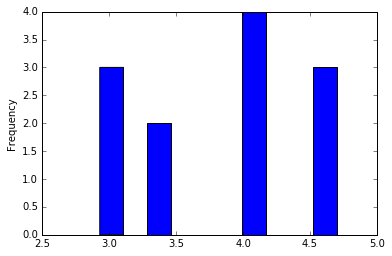

In [86]:
df_gas_kubm['TariffValue'].plot.hist()

### Более сложные запросы

Допустим, мы с самого начала хотели выбрать из исходной таблицы те строки, в которых указан тариф на газ и в качестве единицы измерения указаны `руб/кв.м`. Это можно сделать разными способами. Например, вот так:

In [87]:
df[ (df['TariffItem'] == "Газ") & (df['UnitOfMeasure'] == "руб/кв.м") ]

,Region,TariffItem,UnitOfMeasure,StartDate,EndDate,MeasureDeviceAvail,StoveType,ConsumptionTime,ConsumptionTarget,Agency,TariffValue,global_id,Unnamed: 13
ROWNUM,,,,,,,,,,,,,
3,город Москва (за исключением Троицкого и Новом...,Газ,руб/кв.м,01.07.2012,31.08.2012,нет,NaN,NaN,дома с отоплением от газовых нагревателей,ООО «Газпром межрегионгаз Москва»,25.61,19693682,NaN
52,город Москва (за исключением Троицкого и Новом...,Газ,руб/кв.м,01.01.2012,30.06.2012,нет,NaN,NaN,дома с отоплением от газовых нагревателей,ООО «Газпром межрегионгаз Москва»,22.27,19693622,NaN


Обратите внимание на амперсанд `&` (логическое И) и на скобки — они обязательны.

Как работает эта штука? Очень просто: `df['TariffItem'] == "Газ"` — один ряд с булевскими значениями, `df['UnitOfMeasure'] == "руб/кв.м"` — другой, амперсанд `&` делает поэлементное «И» с этими двумя рядами — в результате получается ряд, в котором стоит `True` только если выполнялись оба условия — и именно по этому ряду мы и производим выборку элементов.

### Шпаргалки

![Шпаргалка1](img/cheatsheet1.jpg)

![Шпаргалка3](img/cheatsheet3.jpg)

![Шпаргалкa2](img/cheatsheet2.jpg)